# Classical import

In [66]:
%load_ext autoreload
%autoreload 2

import cpymad.madx
import numpy as np
import matplotlib.pyplot as plt
import georges
from georges.manzoni import Input, Beam
from georges.manzoni import observers
from georges import vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and convert a MAD-X sequence

In [67]:
m = cpymad.madx.Madx(stdout=False)
m.input(f"""
    BEAM, PARTICLE=PROTON, ENERGY = 0.250+0.938, PARTICLE = PROTON, EX=1e-6, EY=1e-6;

    RHO:=1.35;
    KQ := +0.9;
    LCELL:=4.;
    LQ:= 0.3;
    LB:= 2.0;
    L2:=0.5*(LCELL-LB-LQ);
    L3:= 1.5;
    EANG:=10.*TWOPI/360;
    ANG := TWOPI/4;
    KQ1:= -0.9;

    D1: DRIFT, L=L3;
    D2: DRIFT, L=0.2;

    OO : DRIFT,L=L2;
    BD : SBEND,L=LB, ANGLE=ANG, E1=EANG,E2=EANG, K2=0.;
    MQ : QUADRUPOLE,L=LQ, K1=KQ;
    MQF : QUADRUPOLE,L=LQ, K1=+KQ1;
    MQD : QUADRUPOLE,L=LQ, K1=-KQ1;
    OBS1: MARKER;
    OBS2: MARKER;

    ACHROM: LINE=(MQD,D2,MQF,D2,BD,OO,MQ,OO,BD,D2,MQF,D2,MQD,OBS1);
    RING: LINE=(ACHROM, D1,ACHROM,D1);

    USE, sequence=RING;
    """)
m.command.twiss(sequence='RING', FILE='twiss.tfs')

True

In [73]:
madx_line = georges.TwissSequence(path='.',
                                  filename='twiss.tfs',
                                  lines=51,
                                  with_units=True,
                                  with_beam=True, 
                                  nparticles=50000,
                                  refer='exit'
                                 )

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/libs/georges-core/georges_core/codes_io/mad.py:25: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





# Create the Manzoni input

In [4]:
beam = Beam(kinematics=madx_line.metadata.kinematics,
            distribution=madx_line.metadata.data.values
           )

In [5]:
mi = Input.from_sequence(sequence=madx_line)

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:136: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:136: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:136: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:136: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:136: FutureWarning:

Passing a set as an indexer is deprecated and will raise in

## Track and use a Twiss observer

In [6]:
tw_observer = mi.track(beam=beam, observers=observers.TwissObserver())

# Plot the results

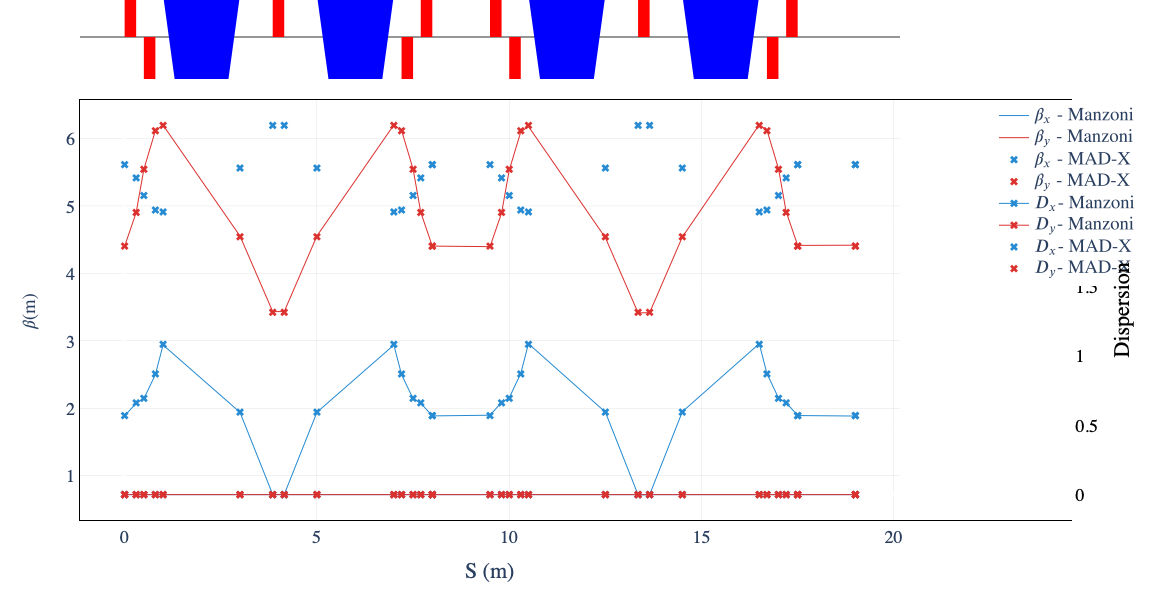

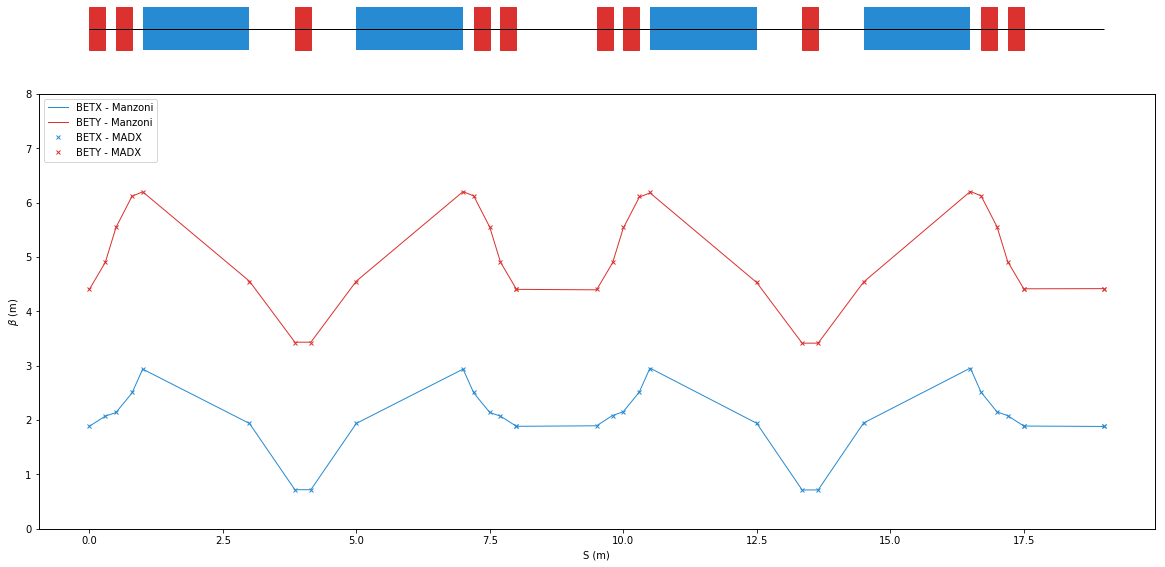

In [63]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(madx_line.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.twiss(tw_observer, with_beta=True, with_alpha=False, with_dispersion=True, tfs_data=madx_line.df)
manzoni_plot.layout['legend'] = dict(x=1.1,
                                     y=1)
manzoni_plot.render()
manzoni_plot.save("figures/twiss_observer_plotly.png", file_format='png')


# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(madx_line.df, print_label=False) # Preparation of the plot
manzoni_plot.twiss(tw_observer, with_beta=True, with_alpha=False, with_dispersion=False, tfs_data=madx_line.df)
ax.legend(loc='upper left')
ax.set_ylim([0, 8])
fig.savefig("figures/twiss_observer_matplotlib.png")